# IRIS DATASET - Intermediate Task 

### Manish Mohan

Problem Statement : Create a DecisionTreeClassifier and visualize it graphically

**Dataset Description**
- Id            : ID of the Species
- SepalLengthCm : Length of the Sepal
- SepalWidthCm  : Width of the Sepal
- PetalLengthCm : Length of the Petal
- PetalWidthCm  : Width of the Petal
- Species       : a group of living organisms consisting of similar individuals capable of exchanging genes

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,classification_report

### Loading Dataset

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

150 Rows and 6 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Missing Values

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Outlier Treatment

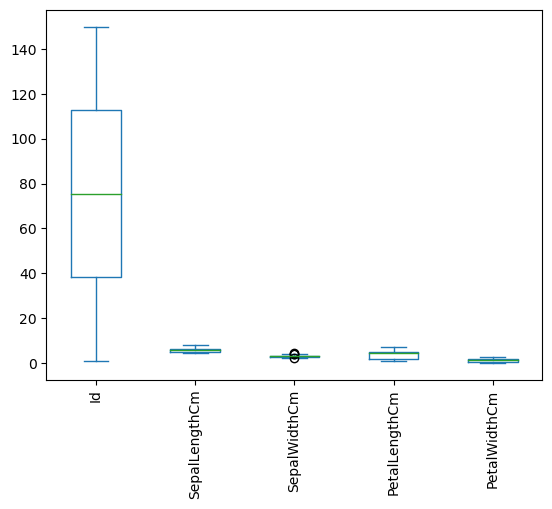

In [8]:
df.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

SepalWidthCm has some outliers

In [9]:
df.drop('Id',axis=1,inplace=True)

In [10]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

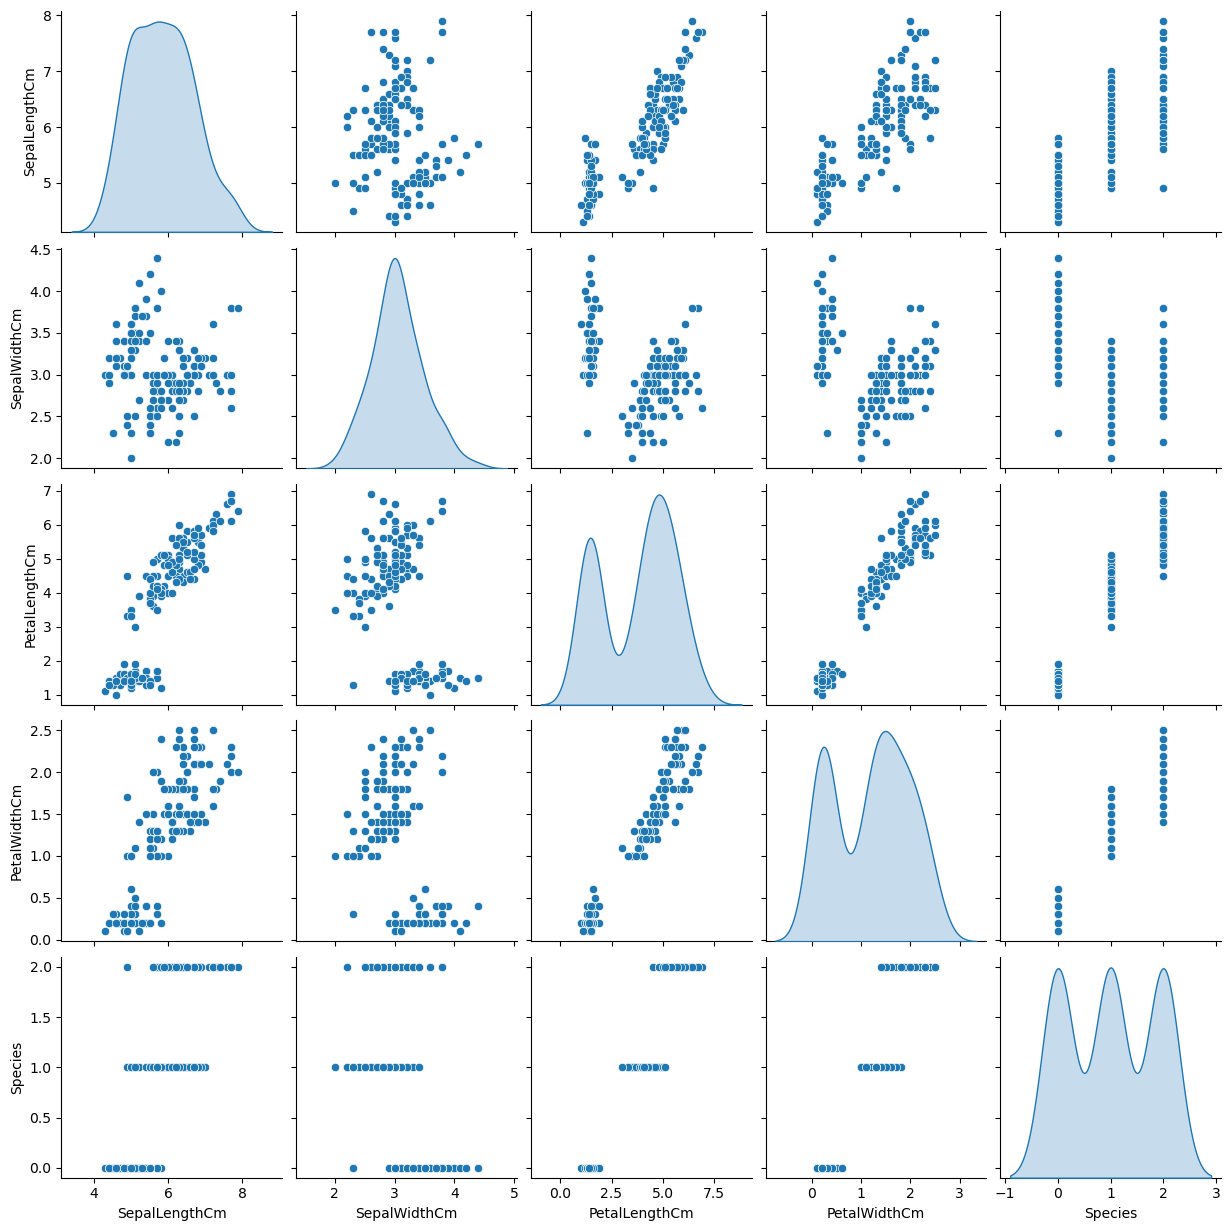

In [15]:
sns.pairplot(df,diag_kind='kde')

petalLength and petalwidth has linear relationship

pedallength and Sepallength has linear relationship

<Axes: >

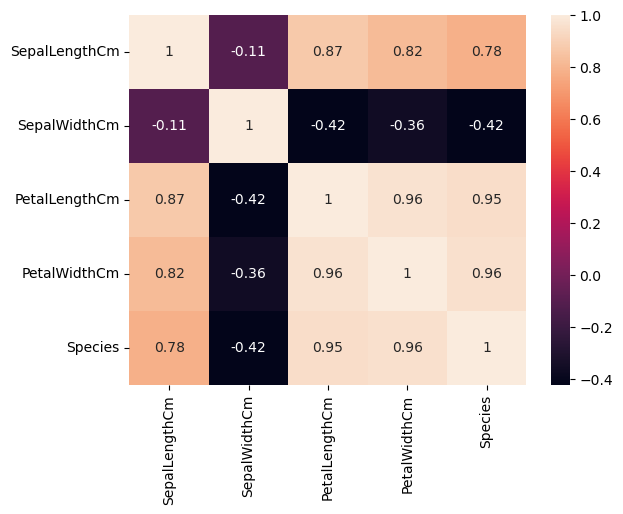

In [17]:
sns.heatmap(df.corr(),annot=True)

some of the features are highly correlated

In [23]:
y=df['Species']
x=df.drop('Species',axis=1)

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=.3)

In [26]:
dt=DecisionTreeClassifier()

In [28]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [29]:
y_pred_dt=dt.predict(xtest)

In [34]:
print(classification_report(ytest,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [49]:
precision_score(ytest,y_pred_dt,average='weighted')

0.9555555555555556

In [50]:
accuracy_score(ytest,y_pred_dt)

0.9555555555555556

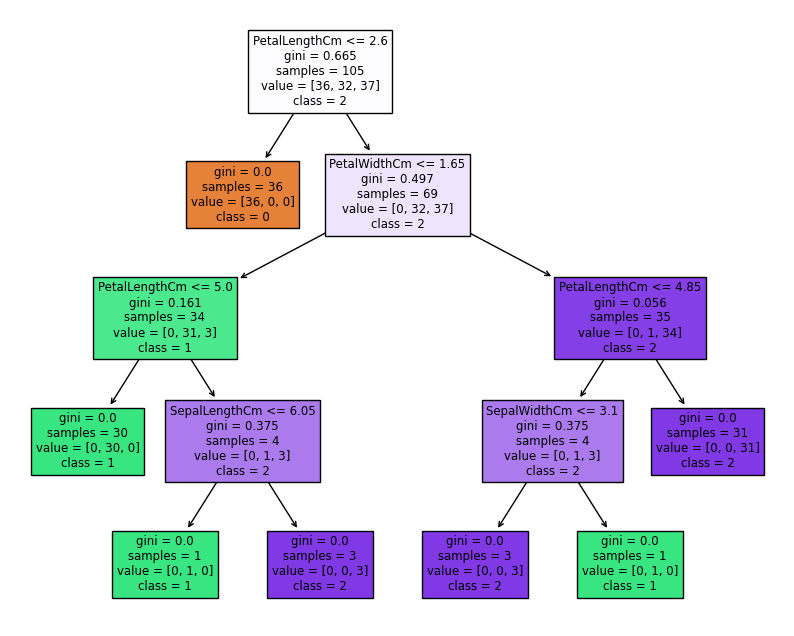

In [59]:
from sklearn.tree import plot_tree

class_names = ['0','1','2']

plt.figure(figsize=(10, 8))
plot_tree(dt, filled=True, feature_names=df.columns, class_names=class_names)
plt.show()